In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
szkoly = pd.read_csv("../dane/szkoly2014.csv", index_col='id_szkoly')

In [4]:
len(szkoly.wielkosc_miejscowosci.value_counts())

848

In [3]:
szkoly.columns

Index(['typ_szkoly', 'publiczna', 'dla_doroslych', 'specjalna', 'przyszpitalna', 'artystyczna', 'rok', 'id_szkoly_oke', 'nazwa_szkoly', 'adres', 'miejscowosc', 'pna', 'poczta', 'wielkosc_miejscowosci', 'matura_miedzynarodowa', 'teryt_szkoly', 'wojewodztwo_szkoly', 'powiat_szkoly', 'gmina_szkoly', 'rodzaj_gminy'], dtype='object')

In [4]:
szkoly.head()

,typ_szkoly,publiczna,dla_doroslych,specjalna,przyszpitalna,artystyczna,rok,id_szkoly_oke,nazwa_szkoly,adres,miejscowosc,pna,poczta,wielkosc_miejscowosci,matura_miedzynarodowa,teryt_szkoly,wojewodztwo_szkoly,powiat_szkoly,gmina_szkoly,rodzaj_gminy
id_szkoly,,,,,,,,,,,,,,,,,,,,
25302,LO,False,True,False,False,NaN,2014,146502-0810Z,Liceum Ogólnokształcące dla Dorosłych nr 48 MGM,Obrońców Tobruku 40,Warszawa,01-494,Warszawa,1724404,False,146502,mazowieckie,Warszawa,Bemowo,dzielnica m.st. Warszawy
25300,LO,False,False,False,False,NaN,2014,146502-0610L,Sportowe Liceum Ogólnokształcące nr 67 MGM,Obrońców Tobruku 40,Warszawa,01-494,Warszawa,1724404,False,146502,mazowieckie,Warszawa,Bemowo,dzielnica m.st. Warszawy
25298,LO,True,False,False,False,NaN,2014,146502-01104,LXXVIII Liceum Ogólnokształcące im. Marii Pawl...,Anieli Krzywoń 3,Warszawa,01-391,Warszawa,1724404,False,146502,mazowieckie,Warszawa,Bemowo,dzielnica m.st. Warszawy
25499,LO,False,False,False,False,NaN,2014,146502-04107,Liceum Ogólnokształcące Niepubliczne nr 29 im....,Powązkowska 90,Warszawa,01-728,Warszawa,1724404,False,146502,mazowieckie,Warszawa,Bemowo,dzielnica m.st. Warszawy
43454,SP,False,False,NaN,NaN,NaN,2014,146502-04P0J,Szkoła Podstwawowa nr 24,Powstańców Śląskich 67a,Warszawa,01-355,Warszawa,1724404,NaN,146502,mazowieckie,Warszawa,Bemowo,dzielnica m.st. Warszawy


In [5]:
szkoly['typ_szkoly'].value_counts()

SP       12317
gimn.     6861
LO        3642
T         2108
LOU        678
TU         527
LP         478
ZZ           1
dtype: int64

In [6]:
# http://zpd.ibe.edu.pl/doku.php?id=r_zmienne&zm=typ_szkoly
# U znaczy uzupełniające

In [7]:
szkoly[pd.notnull(szkoly['matura_miedzynarodowa'])]['typ_szkoly'].value_counts()

LO    3381
T     1949
TU      19
dtype: int64

In [8]:
# dlaczenie nie wszytskie szkoły?

In [6]:
ponadpodstawowe = szkoly[szkoly.typ_szkoly.isin(['LO', 'LOU', 'T', 'TU', 'LP'])]

In [7]:
kol_binarne = ['publiczna', 'dla_doroslych', 'specjalna',
               'przyszpitalna', 'matura_miedzynarodowa']

binarne = ponadpodstawowe.loc[:, kol_binarne]
binarne['technikum'] = ponadpodstawowe['typ_szkoly'].apply(lambda x: x[0] == "T")
binarne['uzupelniajaca'] = ponadpodstawowe['typ_szkoly'].apply(lambda x: x[-1] == "U")

binarne.mean()

publiczna                0.693611
dla_doroslych            0.317622
specjalna                0.009987
przyszpitalna            0.002460
matura_miedzynarodowa    0.003552
technikum                0.354500
uzupelniajaca            0.162115
dtype: float64

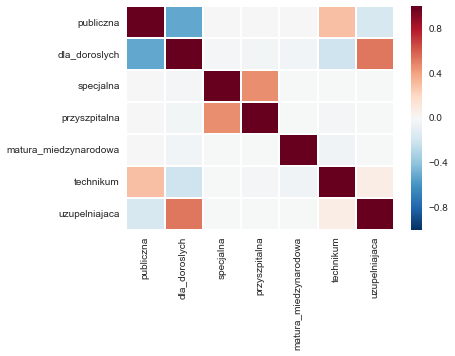

In [32]:
sns.heatmap(binarne.applymap(float).corr());

In [19]:
# to nie jest zmienna binarna
ponadpodstawowe['artystyczna'].value_counts()

LPlast    50
OSM       30
OSSP      24
OSB        5
dtype: int64

In [20]:
ponadpodstawowe['rodzaj_gminy'].value_counts()

miejska                     4437
miejsko-wiejska             1713
wiejska                      550
dzielnica m.st. Warszawy     251
dtype: int64

In [8]:
ponadpodstawowe.query("miejscowosc == 'Bielsko-Biała' & typ_szkoly == 'LO'")[['nazwa_szkoly', 'adres', 'typ_szkoly']].head(10)

,nazwa_szkoly,adres,typ_szkoly
id_szkoly,,,
21687,Liceum Ogólnokształcące Katolickiego Towarzyst...,Krasińskiego 17,LO
21686,Liceum Ogólnokształcące Mistrzostwa Sportowego...,Pl. Wolności 10,LO
21685,Liceum Ogólnokształcące dla Dorosłych EDUKACJA,3 Maja 31,LO
76702,Liceum Ogólnokształcące dla Dorosłych w Bielsk...,Piastowska 21,LO
31442,PROFESJA Centrum Kształcenia Kadr Liceum Ogóln...,Barlickiego 5,LO
21676,Liceum Ogólnokształcące Zgromadzenia Córek Boż...,Broniewskiego 13,LO
21675,Zespół Szkół i Placówek Oświatowych w Bielsku-...,Słowackiego 45,LO
21674,IV Liceum Ogólnokształcące,Słowackiego 15,LO
21673,I Liceum Ogólnokształcące im. Mikołaja Koperni...,Listopadowa 70,LO


In [9]:
ponadpodstawowe.loc[21675]

typ_szkoly                                                              LO
publiczna                                                             True
dla_doroslych                                                        False
specjalna                                                            False
przyszpitalna                                                        False
artystyczna                                                            NaN
rok                                                                   2014
id_szkoly_oke                                                 246101-C210N
nazwa_szkoly             Zespół Szkół i Placówek Oświatowych w Bielsku-...
adres                                                       Słowackiego 45
miejscowosc                                                  Bielsko-Biała
pna                                                                 43-300
poczta                                                       Bielsko-Biała
wielkosc_miejscowosci    

In [22]:
ponadpodstawowe.query("miejscowosc == 'Bielsko-Biała'")[['nazwa_szkoly', 'adres', 'typ_szkoly']].head(10)

,nazwa_szkoly,adres,typ_szkoly
id_szkoly,,,
73073,Uzupełniające Liceum Ogólnokształcące dla Doro...,Powstańców Śląskich 6,LOU
27816,Technikum nr 2 w Zespole Szkół Budowlanych im....,Budowlanych 4,T
21687,Liceum Ogólnokształcące Katolickiego Towarzyst...,Krasińskiego 17,LO
21686,Liceum Ogólnokształcące Mistrzostwa Sportowego...,Pl. Wolności 10,LO
21685,Liceum Ogólnokształcące dla Dorosłych EDUKACJA,3 Maja 31,LO
27815,Technikum nr 3 w Zespole Szkół Elektronicznych...,Słowackiego 24,T
27814,Technikum nr 8 w Zespole Szkół Gastronomicznyc...,Wyspiańskiego 5,T
27817,Bielska Szkoła Przemysłowa - Technikum nr 1,Teodora Sixta 20,T
27818,Technikum Fryzjerskie w Bielsku-Białej Zakładu...,Sempołowskiej 1,T


In [ ]:
# uwaga, V LO w BB ma stary adres!

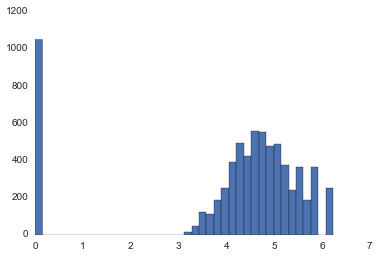

In [29]:
ponadpodstawowe['wielkosc_miejscowosci'].apply(lambda x: np.log10(x+1)).hist(bins=40);

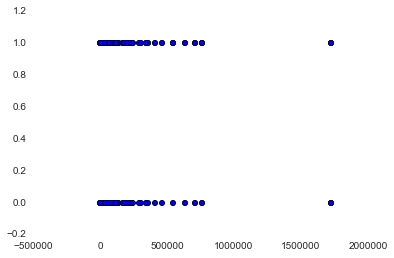

In [38]:
plt.scatter(ponadpodstawowe['wielkosc_miejscowosci'], ponadpodstawowe['publiczna'])

In [56]:
udzial_niepublicznych = ponadpodstawowe.groupby('wielkosc_miejscowosci')['publiczna'] \
                          .apply(lambda x: 1 - x.apply(float).mean())

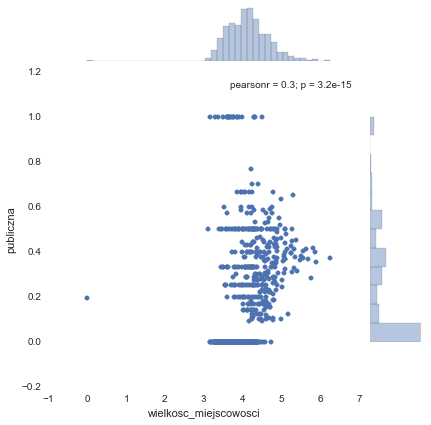

In [74]:
sns.jointplot(x=np.log10(udzial_niepublicznych.index + 1), y=udzial_niepublicznych);

In [91]:
# zakładając, że nie ma różnych miast z tą samą licznością
szkoly_miasta = ponadpodstawowe \
                   .query("wielkosc_miejscowosci > 0") \
                   .groupby('wielkosc_miejscowosci') \
                   .size()

In [98]:
szkoly_miasta = pd.DataFrame({'mieszkancy': szkoly_miasta.index.values,
                              'szkoly': szkoly_miasta.values})

In [104]:
szkoly_miasta['mieszkancy_na_szkole'] = szkoly_miasta.loc[:, 'mieszkancy'] / szkoly_miasta.loc[:, 'szkoly']

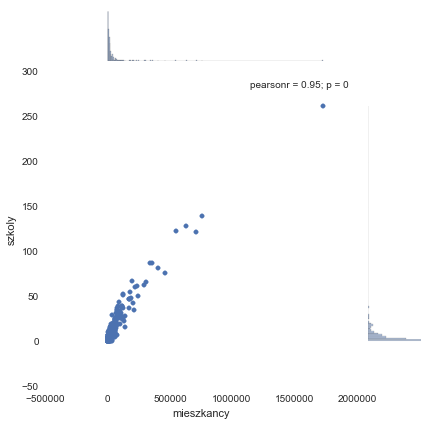

In [105]:
sns.jointplot('mieszkancy', 'szkoly', szkoly_miasta);

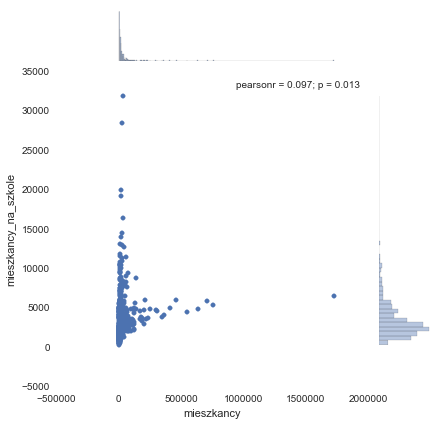

In [106]:
sns.jointplot('mieszkancy', 'mieszkancy_na_szkole', szkoly_miasta);

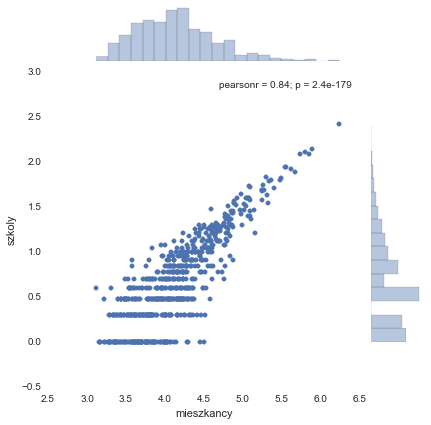

In [100]:
sns.jointplot('mieszkancy', 'szkoly', np.log10(szkoly_miasta));

In [71]:
ponadpodstawowe[ponadpodstawowe['wielkosc_miejscowosci'] == 0][['miejscowosc', 'poczta']].head(10)

,miejscowosc,poczta
id_szkoly,,
24055,Dobiegniew,Dobiegniew
26498,Sypniewo,Sypniewo
23399,Niechlów,Góra
25116,Trzebieszowice,Lądek-Zdrój
26357,Stronie Śląskie,Stronie Śląskie
77708,STRONIE ŚLĄSKIE,STRONIE ŚLĄSKIE
77709,STRONIE ŚLĄSKIE,STRONIE ŚLĄSKIE
26363,Biedrzychowice,Olszyna
25191,Ubocze,Gryfów Śląski
